In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

#We will begin with the base code for sequential/linear 
# and binary search as described in Chapter 1 of Grokking Algorithms (Bhargava 2016)

def linear_Search(list, item):
    for i in list:
        if i == item:
            return i
    # Return none if item does not exist
    return None

def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1
    

  # Item doesn't exist
  return None

In [59]:
#To begin, let's generate some random data to work with. 
#Ensure that a common random number seed is used to generate each of the arrays. 
#We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 
#containing randomly generated uniformly distributed integers from 1 to 10000. 


np.random.seed(seed=572)

array512 = np.random.randint(9999, size=512)
array1024 = np.random.randint(9999, size=1024)
array2048 = np.random.randint(9999, size=2048)
array4096 = np.random.randint(9999, size=4096)
array8192 = np.random.randint(9999, size=8192)

In [66]:
# Sort each of the random number arrays from smallest to largest.  You may use any algorithm to sort the data.
# Recording time it takes to sort each array

start = time.perf_counter()
array512 = np.sort(array512)
end = time.perf_counter()
sort512 = end - start

start = time.perf_counter()
array1024 = np.sort(array1024)
end = time.perf_counter()
sort1024 = end - start

start = time.perf_counter()
array2048 = np.sort(array2048)
end = time.perf_counter()
sort2048 = end - start

start = time.perf_counter()
array4096 = np.sort(array4096)
end = time.perf_counter()
sort4096 = end - start

start = time.perf_counter()
array8192 = np.sort(array8192)
end = time.perf_counter()
sort8192 = end - start

In [67]:
# Execute the base search algorithm (binary search) for each of array noting the execution time for each array.  
# With each execution use the maximum value of the random number array as the number for which you are searching.

max512 = max(array512)
max1024 = max(array1024)
max2048 = max(array2048)
max4096 = max(array4096)
max8192 = max(array8192)

# Linear searches
start = time.perf_counter()
linear_Search(array512, max512)
end = time.perf_counter()
linear512time = end - start

start = time.perf_counter()
linear_Search(array1024, max1024)
end = time.perf_counter()
linear1024time = end - start

start = time.perf_counter()
linear_Search(array2048, max2048)
end = time.perf_counter()
linear2048time = end - start

start = time.perf_counter()
linear_Search(array4096, max4096)
end = time.perf_counter()
linear4096time = end - start

start = time.perf_counter()
linear_Search(array8192, max8192)
end = time.perf_counter()
linear8192time = end - start

# Binary searches

start = time.perf_counter()
binary_search(array512, max512)
end = time.perf_counter()
binary512time = stop - start

start = time.perf_counter()
binary_search(array1024, max1024)
end = time.perf_counter()
binary1024time = end - start

start = time.perf_counter()
binary_search(array2048, max2048)
end = time.perf_counter()
binary2048time = end - start

start = time.perf_counter()
binary_search(array4096, max4096)
end = time.perf_counter()
binary4096time = end - start

start = time.perf_counter()
binary_search(array8192, max8192)
end = time.perf_counter()
binary8192time = end - start

In [68]:
#Now we will compare this to a linear search.  
#Use python (perhaps with the Pandas package) to prepare a five-column table containing the following columns with all times in milliseconds:
#(1) length of the random number array
#(2) sort time
#(3) linear search time for the sorted array
#(4) binary search time for the sorted array
#(5) binary search plus sort times

# Creating the sort + binary search times

binary512 = sort512 + binary512time
binary1024 = sort1024 + binary1024time
binary2048 = sort2048 + binary2048time
binary4096 = sort4096 + binary4096time
binary8192 = sort8192 + binary8192time

# Converting times in milliseconds
sort512ms = sort512*1000
sort1024ms = sort1024*1000
sort2048ms = sort2048*1000
sort4096ms = sort4096*1000
sort8192ms = sort8192*1000

linear512ms = linear512time*1000
linear1024ms = linear1024time*1000
linear2048ms = linear2048time*1000
linear4096ms = linear4096time*1000
linear8192ms = linear8192time*1000

binary512ms = binary512time*1000
binary1024ms = binary1024time*1000
binary2048ms = binary2048time*1000
binary4096ms = binary4096time*1000
binary8192ms = binary8192time*1000

binarysort512ms = binary512*1000
binarysort1024ms = binary1024*1000
binarysort2048ms = binary2048*1000
binarysort4096ms = binary4096*1000
binarysort8192ms = binary8192*1000

# Create array

searchmetrics = pd.DataFrame([["Length", "Sort Time", "Linear Search Time", "Binary Search Time","Binary + Sort Time"],
                                ["512", sort512ms, linear512ms, binary512ms, binarysort512ms],
                                ["1024", sort1024ms, linear1024ms, binary1024ms, binarysort1024ms],
                                ["2048", sort2048ms, linear2048ms, binary2048ms, binarysort2048ms],
                                ["4096", sort4096ms, linear4096ms, binary4096ms, binarysort4096ms],
                                ["8192", sort8192ms, linear8192ms, binary8192ms, binarysort8192ms]])
searchmetrics

,0,1,2,3,4
0,Length,Sort Time,Linear Search Time,Binary Search Time,Binary + Sort Time
1,512,0.1114,0.3857,-8.07686e+06,-8.07686e+06
2,1024,0.0826,0.6662,0.0481,0.1307
3,2048,0.1961,0.6897,0.0467,0.2428
4,4096,0.1886,1.438,0.0482,0.2368
5,8192,0.3333,1.6839,0.0455,0.3788


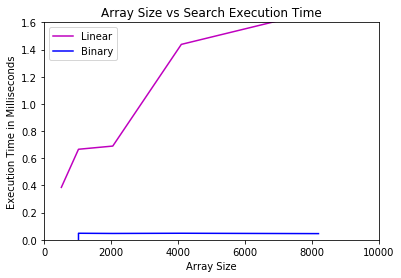

In [69]:
#Use python matplotlib or Seaborn to generate a plot with the size of the random number array on the horizontal axis 
#and with execution time in milliseconds on the vertical axis. 
#The plot should show execution time against array size for linear and binary search algorithms alone.  Discuss the results.


plt.plot([512, 1024, 2048, 4096, 8192],
         [linear512ms, linear1024ms, linear2048ms, linear4096ms, linear8192ms],
         'm-',
         [512, 1024, 2048, 4096, 8192],
         [binary512ms, binary1024ms, binary2048ms, binary4096ms, binary8192ms],
         'b-')
plt.axis([0, 10000, 0, 1.6])
plt.xlabel('Array Size')
plt.ylabel('Execution Time in Milliseconds')
plt.title('Array Size vs Search Execution Time')
plt.legend(['Linear', 'Binary'], loc=2)
plt.show()

As we can see from the plot above, as the array size increases the execution time in miliseconds for the Linear search goes up while the Binary search execution time remains stable regardless of array size. We can conclude that Binary search is more efficient than the Linear search. 

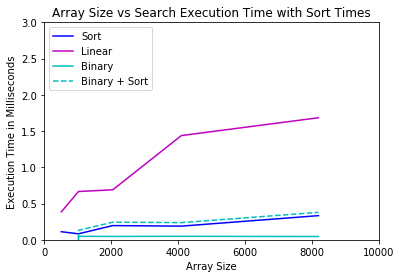

In [70]:
#Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis 
#and with execution time in milliseconds on the vertical axis. 
#The plot should show execution time against problem size for each form of the algorithm being tested.

plt.plot([512, 1024, 2048, 4096, 8192],
         [sort512ms, sort1024ms, sort2048ms, sort4096ms, sort8192ms],
         'b-',
         [512, 1024, 2048, 4096, 8192],
         [linear512ms, linear1024ms, linear2048ms, linear4096ms, linear8192ms],
         'm-',
         [512, 1024, 2048, 4096, 8192],
         [binary512ms, binary1024ms, binary2048ms, binary4096ms, binary8192ms],
         'c-',
         [512, 1024, 2048, 4096, 8192],
         [binarysort512ms, binarysort1024ms, binarysort2048ms, binarysort4096ms, binarysort8192ms],
         'c--')
plt.axis([0, 10000, 0, 3])
plt.xlabel('Array Size')
plt.ylabel('Execution Time in Milliseconds')
plt.title('Array Size vs Search Execution Time with Sort Times')
plt.legend(['Sort', 'Linear', 'Binary','Binary + Sort'], loc=2)
plt.show()

Executive Summary:

In this exercise we compared two different searching algorithms to see which one performed better based on execution time. We created five different arrays of varying sizes (512, 1024, 2048, 4096, and 8192) and then searched those arrays for the maximum value using both a linear and a binary method. The linear search method simply started at the beginning of the array in numerical order and searched each value to see if it was the maximum value. The binary method instead guesses at the middle of the array and then checks to see if the middle value is the highest, if it’s not then it eliminates half of the choices and continues until it has found the value you are searching for. 

Regardless of the size, the binary search algorithm performed better than the linear search algorithm. As the array grew, the linear search algorithm performed worse. The binary search was also faster than the basic sorting function from the numpy library. 

In terms of Big O notation, the linear search performs at O(n) while binary search performs O(log(n)). In other words, the linear search performs at a linear level while the binary search performs at the log of time. 
